In [3]:
import cv2
import matplotlib.pyplot as plt

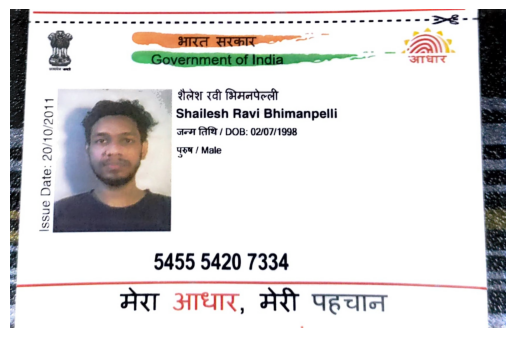

In [26]:
cascade_path = "./models/haarcascade_frontalface_default.xml"
image_path = "./assets/personal/contour_image.jpg"
face_image_path = "./assets/personal/face.jpg"

img = cv2.imread(image_path)

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

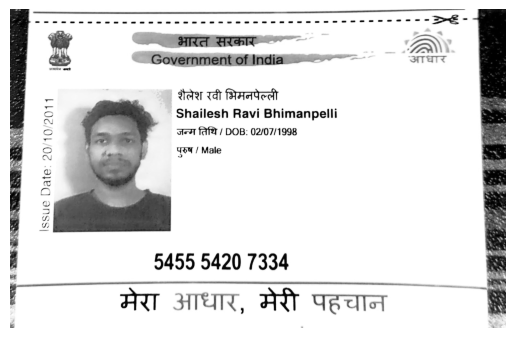

In [13]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_img, cmap="Greys_r")
plt.axis("off")
plt.show()

In [14]:
# Load cascade file
face_cascade = cv2.CascadeClassifier(cascade_path)

In [16]:
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)


In [18]:
faces

array([[240, 360, 233, 233]])

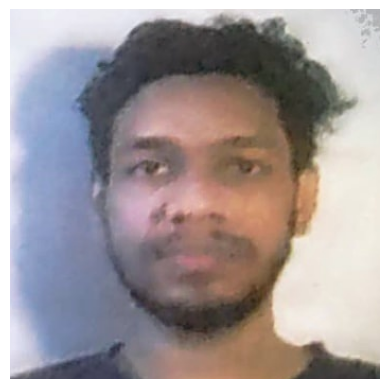

In [23]:
# find face with largest area
max_area = 0
largest_face = None
for (x,y,w,h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face

    # increasing the dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)

    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))
    
    # extracted enlarged face
    extracted_face = img[new_y:new_y+new_h, new_x:new_x+new_w]

plt.figure()
plt.imshow(extracted_face)
plt.axis("off")
plt.show()

# DeepFace

In [32]:
from deepface import DeepFace
import os

In [44]:
# os.environ["TF_USE_LEGACY_KERAS"] = "1"

# this function is not working
result = DeepFace.verify(
  img1_path = face_image_path,
  img2_path = extracted_face,
  model_name = "VGG-Face"
)


ValueError: The layer sequential_6 has never been called and thus has no defined input.

In [43]:
result

{'verified': False,
 'distance': 0.46831178596515366,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 94,
   'y': 165,
   'w': 388,
   'h': 388,
   'left_eye': (356, 307),
   'right_eye': (212, 314)},
  'img2': {'x': 58,
   'y': 58,
   'w': 232,
   'h': 232,
   'left_eye': (219, 149),
   'right_eye': (131, 149)}},
 'time': 2.14}